In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Analisa_Pendapatan_Telkomsel").getOrCreate()

In [2]:
df = spark.read.csv("C:/Users/Hp/Downloads/InfoPerdaganganTelkomsel.csv", header=True, inferSchema=True)

In [3]:
# Menampilkan beberapa baris pertama data
df.show()

+---+-----------+-----+---------+--------+---------+-----------+---------------+---------+
| No|    Tanggal|Harga|Tertinggi|Terendah|Penutupan|     Volume|          Nilai|Frekuensi|
+---+-----------+-----+---------+--------+---------+-----------+---------------+---------+
|  1|08 Des 2023| 3.94|     3.94|     3.9|     3.94| 61.476.300|241.171.716.000|    7.571|
|  2|07 Des 2023| 3.95|     3.95|    3.88|     3.91| 91.076.200|356.134.950.000|    8.816|
|  3|06 Des 2023|  3.9|     3.95|    3.87|     3.92|149.345.100|585.390.509.000|   15.377|
|  4|05 Des 2023| 3.83|     3.85|     3.8|     3.85| 74.608.900|285.680.592.000|   13.935|
|  5|04 Des 2023| 3.84|     3.86|    3.78|     3.81|118.542.300|453.436.844.000|   12.449|
|  6|01 Des 2023| 3.79|     3.84|    3.79|     3.83| 81.037.200|309.153.834.000|   10.289|
|  7|  30-Nov-23| 3.75|     3.82|    3.74|     3.76|258.522.400|974.014.877.000|   12.323|
|  8|  29-Nov-23| 3.75|     3.77|     3.7|     3.72| 56.467.400|210.355.066.000|    7.765|

In [4]:
# Menampilkan skema data
df.printSchema()  

root
 |-- No: integer (nullable = true)
 |-- Tanggal: string (nullable = true)
 |-- Harga: double (nullable = true)
 |-- Tertinggi: double (nullable = true)
 |-- Terendah: double (nullable = true)
 |-- Penutupan: double (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Nilai: string (nullable = true)
 |-- Frekuensi: double (nullable = true)



In [5]:
# Statistik deskriptif
df.describe().show()  

+-------+------------------+-----------+------------------+------------------+------------------+------------------+----------+-----------------+-----------------+
|summary|                No|    Tanggal|             Harga|         Tertinggi|          Terendah|         Penutupan|    Volume|            Nilai|        Frekuensi|
+-------+------------------+-----------+------------------+------------------+------------------+------------------+----------+-----------------+-----------------+
|  count|               962|        962|               962|               962|               962|               962|       962|              962|              962|
|   mean|             481.5|       NULL| 3.340010395010397|3.7510602910602877|3.6634823284823295| 3.706091476091474|      NULL|             NULL|14.32879521829521|
| stddev|277.84977955722763|       NULL|1.3034600156425278|0.4968608203724106|0.4981238830985716|0.4997909073209446|      NULL|             NULL|8.012346162825391|
|    min|       

In [6]:
# Contoh menghapus baris dengan nilai null
df = df.na.drop()

In [7]:
total_pendapatan = df.agg({"Tertinggi": "sum"}).collect()[0][0]
print("Total Pendapatan Perusahaan:", total_pendapatan)

Total Pendapatan Perusahaan: 3608.519999999997


In [8]:
total_pendapatan = df.agg({"Terendah": "sum"}).collect()[0][0]
print("Total Pendapatan Perusahaan:", total_pendapatan)

Total Pendapatan Perusahaan: 3524.270000000001


In [9]:
# Total pendapatan perusahaan
total_pendapatan = df.agg({"Tertinggi": "sum"}).collect()[0][0]
print("Total Pendapatan Perusahaan:", total_pendapatan)

# Rata-rata pendapatan per kategori
avg_pendapatan_per_kategori = df.groupBy("Tanggal").agg({"Tertinggi": "avg"})
avg_pendapatan_per_kategori.show()

Total Pendapatan Perusahaan: 3608.519999999997
+-----------+--------------+
|    Tanggal|avg(Tertinggi)|
+-----------+--------------+
|15 Mei 2023|          3.99|
|  20-Jan-22|           4.3|
|07 Des 2021|           4.2|
|  16-Nov-20|           3.1|
|30 Okt 2023|           3.5|
|  22-Feb-21|          3.24|
|  28-Jan-21|          3.33|
|   1-Jul-22|          4.04|
|  31-Jan-22|          4.25|
|  16-Apr-21|          3.37|
|22 Des 2020|          3.54|
|   7-Jan-20|          3.97|
|04 Agt 2023|          3.73|
|  24-Jul-23|          3.93|
|22 Des 2022|          3.81|
|  18-Feb-22|          4.44|
|   5-Jan-22|          4.19|
|21 Des 2021|          4.19|
|03 Agt 2020|          3.06|
|  15-Jul-20|          3.13|
+-----------+--------------+
only showing top 20 rows



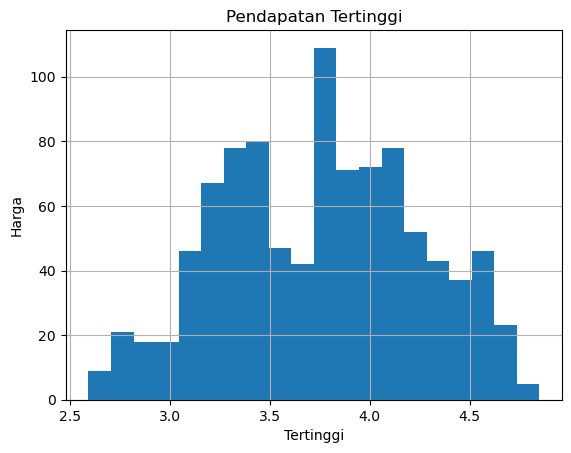

In [10]:
# Contoh: Visualisasi histogram pendapatan menggunakan Matplotlib
import matplotlib.pyplot as plt

pendapatan_data = df.select("Tertinggi").toPandas()
pendapatan_data.hist(bins=20)
plt.title("Pendapatan Tertinggi")
plt.xlabel("Tertinggi")
plt.ylabel("Harga")
plt.show()


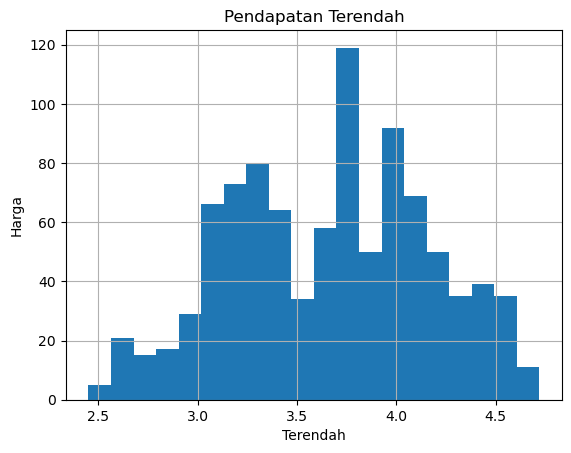

In [11]:
# Contoh: Visualisasi histogram pendapatan menggunakan Matplotlib
import matplotlib.pyplot as plt

pendapatan_data = df.select("Terendah").toPandas()
pendapatan_data.hist(bins=20)
plt.title("Pendapatan Terendah")
plt.xlabel("Terendah")
plt.ylabel("Harga")
plt.show()


In [12]:
# Contoh: Analisis pendapatan per kategori
df.groupBy("Tanggal").agg({"Tertinggi": "avg"}).show()

+-----------+--------------+
|    Tanggal|avg(Tertinggi)|
+-----------+--------------+
|15 Mei 2023|          3.99|
|  20-Jan-22|           4.3|
|07 Des 2021|           4.2|
|  16-Nov-20|           3.1|
|30 Okt 2023|           3.5|
|  22-Feb-21|          3.24|
|  28-Jan-21|          3.33|
|   1-Jul-22|          4.04|
|  31-Jan-22|          4.25|
|  16-Apr-21|          3.37|
|22 Des 2020|          3.54|
|   7-Jan-20|          3.97|
|04 Agt 2023|          3.73|
|  24-Jul-23|          3.93|
|22 Des 2022|          3.81|
|  18-Feb-22|          4.44|
|   5-Jan-22|          4.19|
|21 Des 2021|          4.19|
|03 Agt 2020|          3.06|
|  15-Jul-20|          3.13|
+-----------+--------------+
only showing top 20 rows



In [13]:
# Contoh: Analisis time series pendapatan
df.groupBy("tanggal").agg({"Tertinggi": "sum"}).show()
df.groupBy("tanggal").agg({"Terendah": "sum"}).show()
df.groupBy("tanggal").agg({"Penutupan": "sum"}).show()

+-----------+--------------+
|    tanggal|sum(Tertinggi)|
+-----------+--------------+
|15 Mei 2023|          3.99|
|  20-Jan-22|           4.3|
|07 Des 2021|           4.2|
|  16-Nov-20|           3.1|
|30 Okt 2023|           3.5|
|  22-Feb-21|          3.24|
|  28-Jan-21|          3.33|
|   1-Jul-22|          4.04|
|  31-Jan-22|          4.25|
|  16-Apr-21|          3.37|
|22 Des 2020|          3.54|
|   7-Jan-20|          3.97|
|04 Agt 2023|          3.73|
|  24-Jul-23|          3.93|
|22 Des 2022|          3.81|
|  18-Feb-22|          4.44|
|   5-Jan-22|          4.19|
|21 Des 2021|          4.19|
|03 Agt 2020|          3.06|
|  15-Jul-20|          3.13|
+-----------+--------------+
only showing top 20 rows

+-----------+-------------+
|    tanggal|sum(Terendah)|
+-----------+-------------+
|15 Mei 2023|         3.93|
|  20-Jan-22|         4.19|
|07 Des 2021|         4.12|
|  16-Nov-20|         3.02|
|30 Okt 2023|         3.39|
|  22-Feb-21|         3.17|
|  28-Jan-21|         3.23

In [14]:
# Contoh: Uji perbedaan pendapatan antara dua kelompok
from pyspark.sql.functions import col, when

df = df.withColumn("kelompok_pendapatan", when(col("Harga") > 3, "Tinggi").otherwise("Rendah"))
hasil_uji = df.groupBy("kelompok_pendapatan").agg({"Penutupan": "sum"}).show()

+-------------------+------------------+
|kelompok_pendapatan|    sum(Penutupan)|
+-------------------+------------------+
|             Tinggi|3088.9299999999985|
|             Rendah| 476.3300000000002|
+-------------------+------------------+



In [15]:
# Contoh: Korelasi antara pendapatan dan biaya
df.corr("Penutupan", "Harga")

0.721708153689563

In [16]:
# Contoh: Distribusi frekuensi kategori
df.groupBy("Penutupan").count().show()


+---------+-----+
|Penutupan|count|
+---------+-----+
|     3.26|    4|
|     2.86|    4|
|     4.19|    5|
|     2.82|    1|
|     2.62|    3|
|     3.02|    5|
|     4.23|    4|
|     4.02|    7|
|     4.36|    1|
|     3.08|    3|
|     3.57|    3|
|      3.5|    7|
|     3.56|    2|
|     4.34|    6|
|     3.33|    8|
|     3.88|   10|
|     3.93|    3|
|     3.19|    9|
|     3.45|    6|
|     2.97|    1|
+---------+-----+
only showing top 20 rows



In [17]:
# Contoh: Analisis segmentasi pelanggan
df.groupBy("Nilai").agg({"Penutupan": "avg", "Tertinggi": "avg"}).show()
df.groupBy("Nilai").agg({"Harga": "avg", "Penutupan": "avg"}).show()


+-----------------+--------------+--------------+
|            Nilai|avg(Penutupan)|avg(Tertinggi)|
+-----------------+--------------+--------------+
|  357.080.957.000|          3.98|          3.99|
|  287.943.725.000|           4.3|           4.3|
|  258.126.292.000|           4.3|           4.3|
|  449.803.581.000|          4.55|          4.58|
|  329.364.150.000|           3.6|          3.65|
|  185.408.719.000|          3.23|          3.27|
|  859.676.824.000|          3.32|          3.34|
|  496.348.288.000|          3.15|          3.16|
|  217.990.699.000|          3.96|          3.99|
|  894.555.296.000|           4.7|           4.7|
|1.005.491.901.000|           4.3|          4.39|
|  444.615.933.000|          4.17|          4.25|
|  284.321.087.000|          3.44|          3.48|
|  684.452.047.000|          2.83|          2.84|
|  783.225.382.000|          3.68|          3.74|
|  216.778.180.000|           3.4|           3.4|
|  586.130.524.000|          3.46|           3.5|


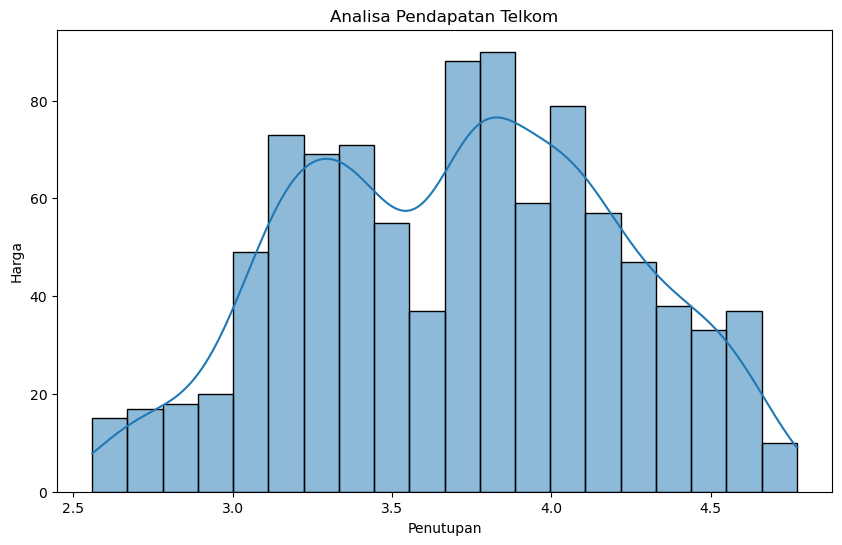

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Visualisasi Histogram Pendapatan
pendapatan_data = df.select("Penutupan").toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(pendapatan_data["Penutupan"], bins=20, kde=True)
plt.title("Analisa Pendapatan Telkom")
plt.xlabel("Penutupan")
plt.ylabel("Harga")
plt.show()


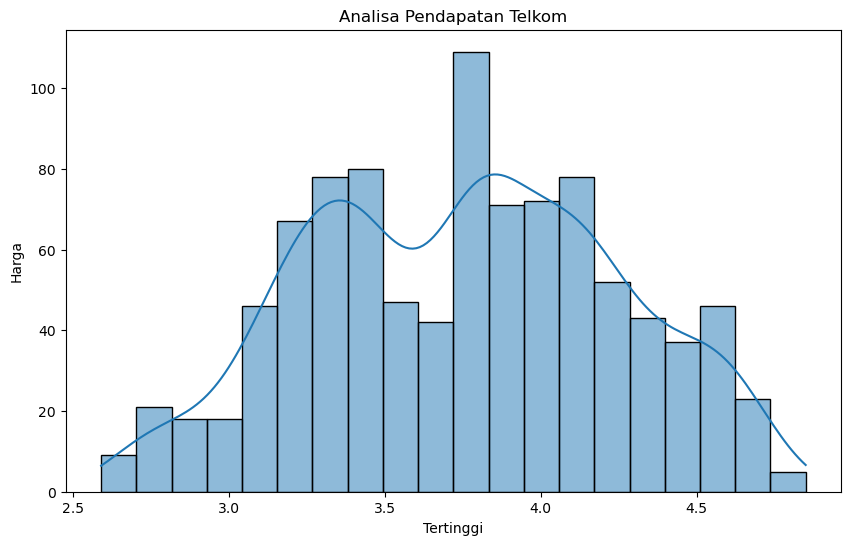

In [20]:
# Visualisasi Histogram Pendapatan
pendapatan_data = df.select("Tertinggi").toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(pendapatan_data["Tertinggi"], bins=20, kde=True)
plt.title("Analisa Pendapatan Telkom")
plt.xlabel("Tertinggi")
plt.ylabel("Harga")
plt.show()


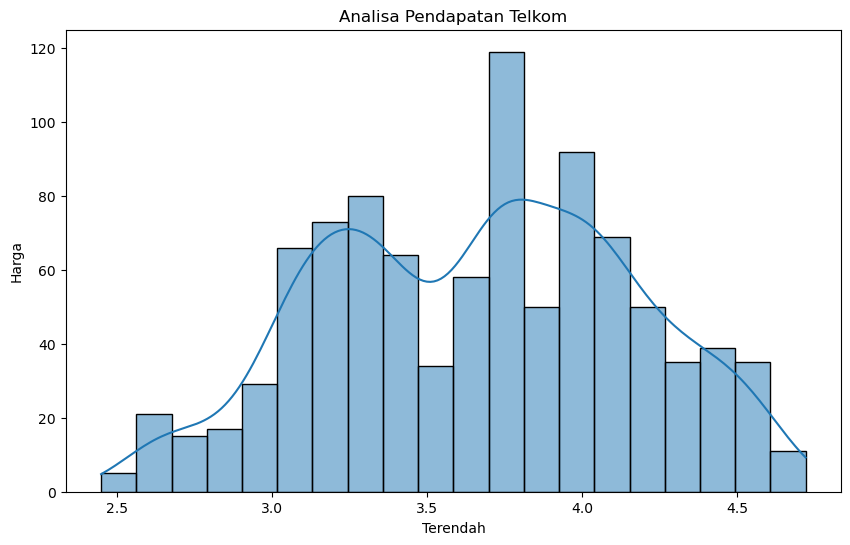

In [21]:
# Visualisasi Histogram Pendapatan
pendapatan_data = df.select("Terendah").toPandas()

plt.figure(figsize=(10, 6))
sns.histplot(pendapatan_data["Terendah"], bins=20, kde=True)
plt.title("Analisa Pendapatan Telkom")
plt.xlabel("Terendah")
plt.ylabel("Harga")
plt.show()


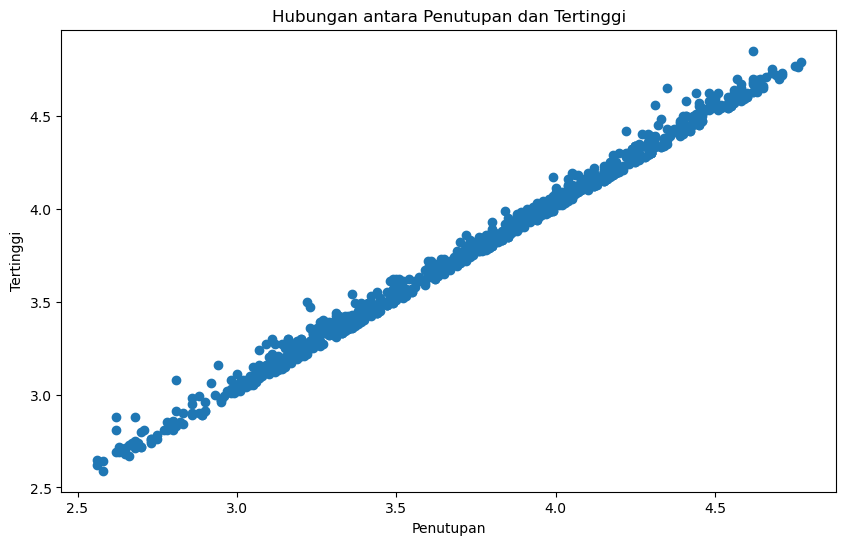

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df.select("Penutupan").toPandas(), df.select("Tertinggi").toPandas())
plt.title("Hubungan antara Penutupan dan Tertinggi")
plt.xlabel("Penutupan")
plt.ylabel("Tertinggi")
plt.show()

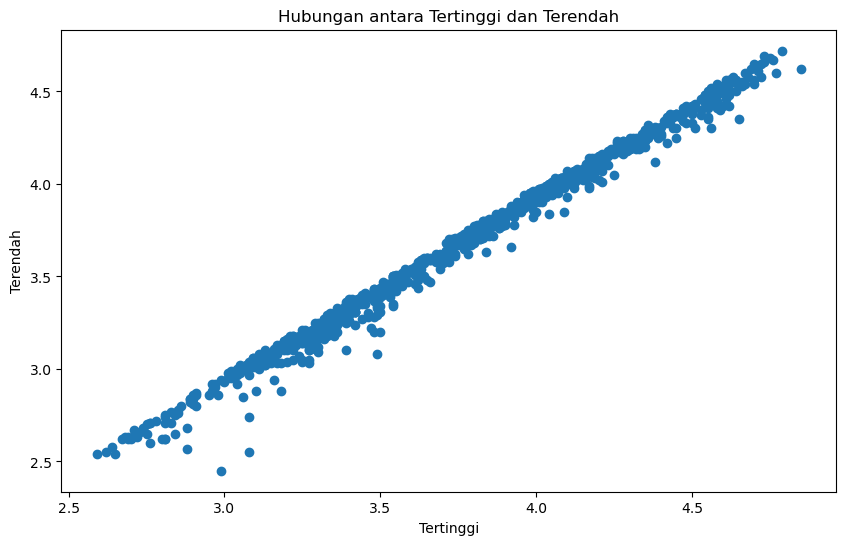

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df.select("Tertinggi").toPandas(), df.select("Terendah").toPandas())
plt.title("Hubungan antara Tertinggi dan Terendah")
plt.xlabel("Tertinggi")
plt.ylabel("Terendah")
plt.show()

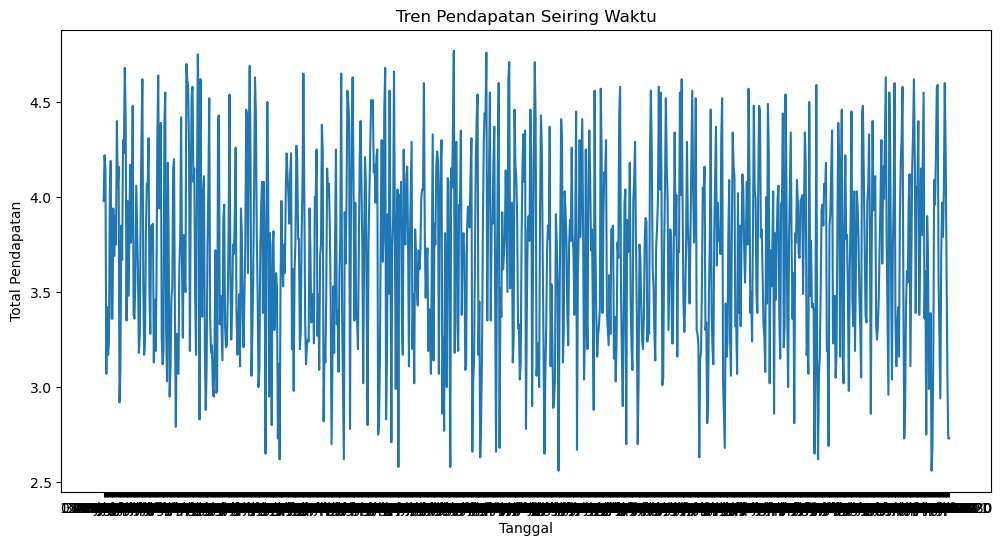

In [24]:
time_series_data = df.groupBy("tanggal").agg({"Penutupan": "sum"}).toPandas()

plt.figure(figsize=(12, 6))
plt.plot(time_series_data["tanggal"], time_series_data["sum(Penutupan)"])
plt.title("Tren Pendapatan Seiring Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Total Pendapatan")
plt.show(20)


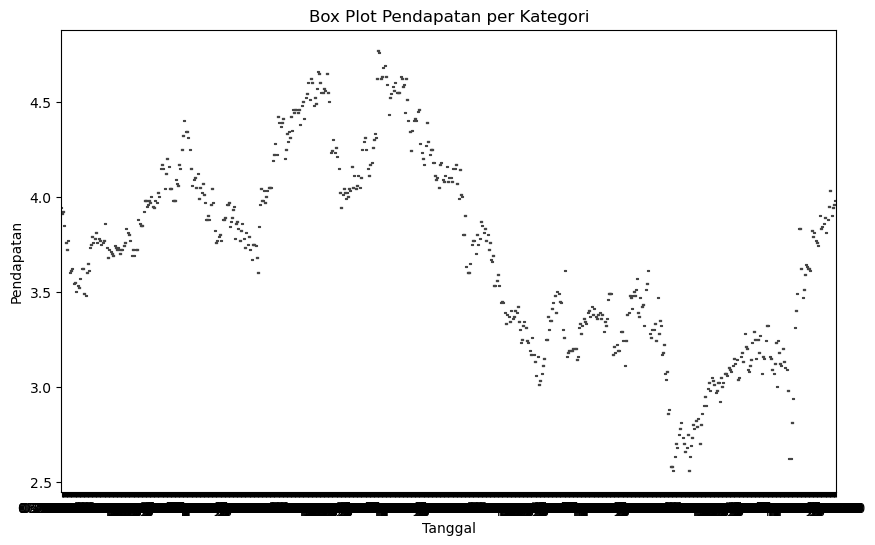

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Tanggal", y="Penutupan", data=df.toPandas())
plt.title("Box Plot Pendapatan per Kategori")
plt.xlabel("Tanggal")
plt.ylabel("Pendapatan")
plt.show()


<Figure size 1200x600 with 0 Axes>

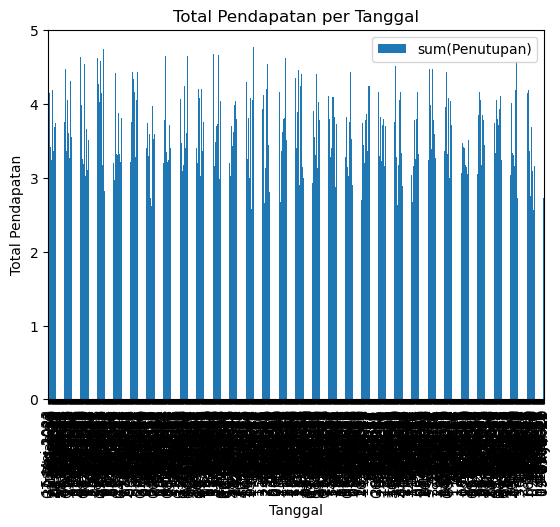

In [26]:
plt.figure(figsize=(12, 6))
df.groupBy("Tanggal").agg({"Penutupan": "sum"}).toPandas().plot(kind="bar", x="Tanggal", y="sum(Penutupan)")
plt.title("Total Pendapatan per Tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Total Pendapatan")
plt.show(10)


In [27]:
# Contoh: Analisis tren waktu
df.groupBy("tanggal").agg({"Penutupan": "sum"}).show()

+-----------+--------------+
|    tanggal|sum(Penutupan)|
+-----------+--------------+
|15 Mei 2023|          3.98|
|  20-Jan-22|          4.22|
|07 Des 2021|          4.15|
|  16-Nov-20|          3.07|
|30 Okt 2023|          3.42|
|  22-Feb-21|          3.17|
|  28-Jan-21|          3.24|
|   1-Jul-22|          4.02|
|  31-Jan-22|          4.19|
|  16-Apr-21|          3.36|
|22 Des 2020|          3.36|
|   7-Jan-20|          3.94|
|04 Agt 2023|          3.69|
|  24-Jul-23|           3.9|
|22 Des 2022|          3.75|
|  18-Feb-22|           4.4|
|   5-Jan-22|          4.05|
|21 Des 2021|          4.16|
|03 Agt 2020|          2.92|
|  15-Jul-20|          3.09|
+-----------+--------------+
only showing top 20 rows

